In [8]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pyproj as pp
import json
from shapely.geometry import Point,Polygon

<AxesSubplot:>

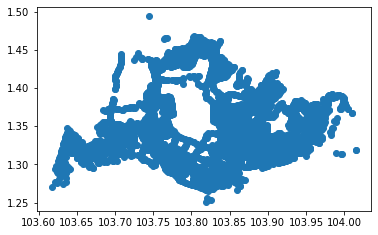

In [9]:
bus_stops = gpd.read_file(r"D:\NUS\project\LTA_data\point_data\bus_stops\bus_stops_wszone.shp")
bus_stops.plot()

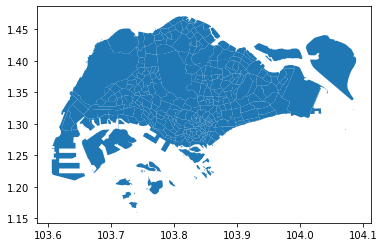

In [10]:
subzone = gpd.read_file(r"D:\NUS\project\Singapore_subzone\subzone_2019\MasterPlan_SUBZONE_2019\master-plan-2019-subzone-boundary-no-sea-geojson-polygon.shp")
subzone.plot()
subzone = subzone.to_crs('epsg:4326')

In [28]:
polygon = Polygon([(103.605701,1.210240),(104.084391,1.210240),(104.084391,1.470775),(103.605701,1.470775),(103.605701,1.210240)])

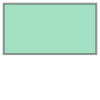

In [29]:
polygon

In [5]:
points_geometry = bus_stops['geometry']
lon = []
lat = []
for i in range(len(points_geometry)):
    x = points_geometry[i].coords[0][0]
    y = points_geometry[i].coords[0][1]
    x = float(x)
    y = float(y)
    lon.append(x)
    lat.append(y)

In [9]:
stops = bus_stops[['desc','PTcode','SUBZONE_N']]
pts = []
for x,y in zip(lon,lat):
    pts.append(Point(x,y))
    
bus_stops_pt = gpd.GeoDataFrame(stops, geometry=pts, crs="EPSG:3414")
bus_stops_pt

,desc,PTcode,SUBZONE_N,geometry
0,Blk 224A,65539,MATILDA,POINT (34719.631 42683.817)
1,Carissa Pk,98309,FLORA DRIVE,POINT (42625.345 38003.381)
2,Before Sumang Lane,65541,MATILDA,POINT (34441.411 42824.350)
3,Econ Group,49159,RESERVOIR VIEW,POINT (18261.920 46529.810)
4,Bef Mariam Wk,98311,FLORA DRIVE,POINT (43043.145 37931.100)
...,...,...,...,...
5104,Blk 441D,67631,FERNVALE,POINT (32713.156 41582.225)
5105,Blk 436A,67639,FERNVALE,POINT (32740.309 41661.618)
5106,Opp Blk 461B,67991,FERNVALE,POINT (32251.756 41904.653)
5107,Blk 461B,67999,FERNVALE,POINT (32248.529 41884.197)


In [10]:
bus_stops_pt = bus_stops_pt.to_crs('epsg:4326')

In [16]:
bus_stops_pt.loc[bus_stops_pt['SUBZONE_N'] == 'VICTORIA']

,desc,PTcode,SUBZONE_N,geometry
283,Hotel Grand Pacific,1012,VICTORIA,POINT (103.85254 1.29685)
284,St. Joseph's Ch,1013,VICTORIA,POINT (103.85322 1.29771)
320,Opp Bugis Junction,1112,VICTORIA,POINT (103.85520 1.30009)
1067,BEF BENCOOLEN STN EXIT A,4029,VICTORIA,POINT (103.85093 1.29948)
1910,OPP NAFA CAMPUS 3,7518,VICTORIA,POINT (103.85211 1.30096)
1917,Fu Lu Shou Cplx,7551,VICTORIA,POINT (103.85461 1.30172)
1919,Bef Waterloo St,7561,VICTORIA,POINT (103.85268 1.29945)
1921,Aft Waterloo St,7569,VICTORIA,POINT (103.85301 1.29950)


In [30]:
bus_stops_pt.to_file(r'D:\NUS\project\LTA_data\point_data\bus_stops\bus_stops_wszone.shp')

D:\anaconda\Anaconda\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [31]:
bus_stops_pt = gpd.read_file(r'D:\NUS\project\LTA_data\point_data\bus_stops\bus_stops_wszone.shp')

In [33]:
bus_stops_pt = bus_stops_pt.drop_duplicates('PTcode')

In [50]:
bus_stops_pt = bus_stops_pt.to_crs('epsg:4326')
bus_stops_pt_clip = bus_stops_pt.clip(polygon)

In [51]:
bus_stops_pt_clip = bus_stops_pt_clip.sort_values(['SUBZONE_N'])
bus_stops_pt_clip.index = range(len(bus_stops_pt_clip))

In [52]:
bus_stops_pt_clip = bus_stops_pt_clip.iloc[0:5104,:]
bus_stops_pt_clip

,desc,PTcode,SUBZONE_N,geometry
0,Blk 592C,58051,ADMIRALTY,POINT (103.82843 1.45088)
1,Opp Blk 311,58109,ADMIRALTY,POINT (103.82309 1.44668)
2,OPP AUCKLAND ROAD WEST,58199,ADMIRALTY,POINT (103.82788 1.45905)
3,Opp Sembawang Corp Industries,58179,ADMIRALTY,POINT (103.82351 1.45856)
4,Aft Admiral Hill,58159,ADMIRALTY,POINT (103.82236 1.44822)
...,...,...,...,...
5099,Bef Yunnan Cres,27509,YUNNAN,POINT (103.69136 1.34044)
5100,Blk 762,27431,YUNNAN,POINT (103.69735 1.34947)
5101,Blk 920,27141,YUNNAN,POINT (103.68780 1.33968)
5102,Gek Poh Shop Ctr,27389,YUNNAN,POINT (103.69810 1.34845)


In [55]:
bus_stops_pt_clip.to_file(r'D:\NUS\project\LTA_data\point_data\bus_stops\bus_stops_wszone_clip.shp')

D:\anaconda\Anaconda\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [56]:
fishnet = gpd.read_file(r"C:\Users\YOLO\Desktop\early cases\early_cases_fishnet\fishnet_1km\sg_island_fishnet1km_early_cases_hotspot.shp")

In [ ]:
bus_stop_fishnet